In [2]:
!pip install -q quantities


     |████████████████████████████████| 92kB 4.2MB/s 


# Ley de PLank de radiación del Cuerpo Negro

$$B \lambda(T) = \frac{2 \pi h c^2 / \lambda^5}{e^{hc / \lambda k_B T} - 1}$$

1 h (Planck_constant)
1 k (Boltzmann_constant)
UnitConstant('Boltzmann_constant', 1.3806504e-23 * J/K, 'k')
UnitConstant('Planck_constant', 6.62606896e-34 * s*J, 'h')
26421.629609697076 W/(m**2*nm*sr)


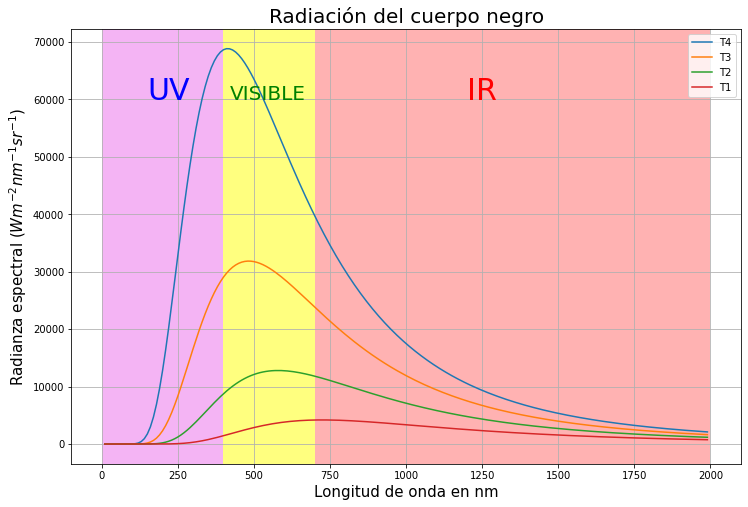

In [3]:
# -*- coding: utf-8 -*-
"""
"""
from __future__ import division

import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

print (pq.constants.Planck_constant)
print (pq.constants.Boltzmann_constant)
print(repr(pq.constants.Boltzmann_constant))
print(repr(pq.constants.Planck_constant))

def B(wl,T):
    '''wl es un array de longitudes de onda con unidades de longitud
    T es una temperatura expresada en Kelvin
    el resultado es un array de r.e. con unidades W/(m**2 * nm * sr)
    '''
    I = 2 * pq.constants.h * (pq.c)**2 / wl**5 *  \
        1 / (np.exp((pq.constants.h*pq.c \
        / (wl*pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.nm *pq.sr))
a=B( 5000 *pq.angstrom, 5780 *pq.K)
print (a)

#T1 = 4000 * pq.Kelvin
T2 = 5000 * pq.Kelvin
T3 = 6000 * pq.Kelvin
T4 = 7000 * pq.Kelvin
T1 = 4000 #@param {type:"slider", min:250, max:11000, step:10}
T1=T1 * pq.Kelvin

wl = np.arange(10,2000,10) * pq.nm    # array de longitudes de onda en nanometros

fig, ax = plt.subplots(figsize=(12, 8))
T4Text=str(T4)
ax.plot(wl, B(wl,T4), label='T4')
ax.plot(wl, B(wl,T3), label='T3')
ax.plot(wl, B(wl,T2), label='T2')
ax.plot(wl, B(wl,T1), label='T1')
ax.legend()
ax.set_title(u'Radiación del cuerpo negro')
ax.title.set_fontsize(20)
ax.set_xlabel('Longitud de onda en nm')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radianza espectral $(W m^{-2}nm^{-1}sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.axvspan(0,400,facecolor = 'violet',alpha = 0.6)
ax.axvspan(400,700, facecolor='yellow', alpha = 0.5)
ax.axvspan(700,2000, facecolor ='red', alpha = 0.3)
ax.text(150,6e4, 'UV', fontsize=30, color = 'b')
ax.text(1200,6e4, 'IR', fontsize=30, color = 'r')
ax.text(420,6e4, 'VISIBLE', fontsize=20, color = 'green');
plt.grid()


In [4]:

from scipy.constants import h, c, k
from pylab import *
from numpy import *

Ley de Planck en dependiendo de nu (frecuencia) y longitud de onda
$$ I(\nu, T) = \frac{2h\nu^3}{c^2} 
\frac{1}{e^{\frac{h\nu}{kT}} - 1} \qquad 
\\
I(\lambda, T) d\lambda = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda kT}} - 1} d\lambda$$
Ley de Wien $$ I(\nu, T) = \frac{2h\nu^3}{c^2}e^{-\frac{h\nu}{kT}}$$
Ley de Rayleigh-Jeans $$ I(\nu, T) = \frac{2\nu^2 kT}{c^2}$$

In [5]:
#https://www.w3schools.com/python/python_lambda.asp 
"""Este lambda no tiene nada que ver con la parte fisica es una forma de declarar funciones breves en Python """
# Ley de Planck
P = lambda nu, T: 2*h*nu**3/c**2 * 1/(exp(h*nu/(k*T))-1)
#nu Frecuencia
Pl = lambda l, T: 2*h*c**2/l**5 * 1/(exp(h*c/(l*k*T))-1)
# Ley de Wien
W = lambda nu, T: 2*h*nu**3/c**2 * exp(-h*nu/(k*T))
# Ley de Rayleight 
R = lambda nu, T: 2*nu**2*k*T/c**2

4.7693181662399e-09


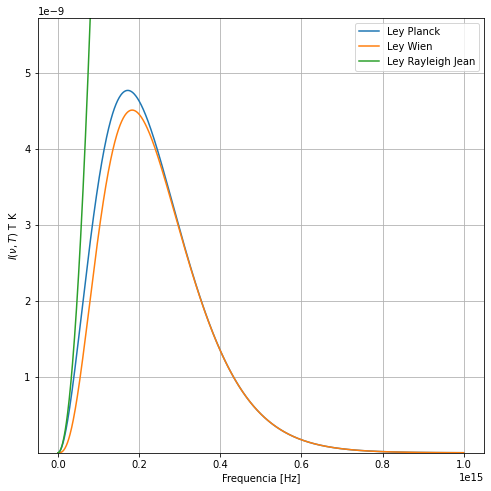

In [6]:
#nu = linspace(1.0e10, 1.0e15, 1.0e3)
#nu = linspace(100000000, 1000000000000000,1000)
nu = linspace(1e10, 1e15, 1000)
T = 2930 #@param {type:"slider", min:250, max:11000, step:10}
fig, ax = plt.subplots(figsize=(8, 8))
plot(nu, P(nu,T), label = 'Ley Planck')
plot(nu, W(nu,T), label = 'Ley Wien')
plot(nu, R(nu,T), label = 'Ley Rayleigh Jean')
print(max(P(nu,T)))
ylim(min(P(nu,T)),1.2*max(P(nu,T)))
legend()
xlabel("Frequencia [Hz]")
ylabel(r"$I(\nu, T)$ T K")
plt.grid()



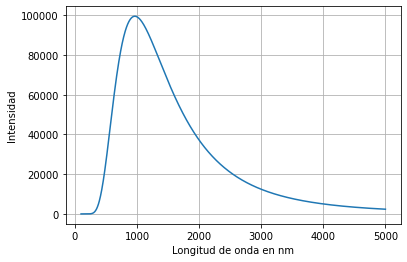

In [ ]:
#otra manera de resolverlo es usando la libreria  astropy
#https://docs.astropy.org/en/stable/index.html

import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.blackbody import blackbody_lambda
from astropy import units as u
T = 3000*u.K
wavelength = np.linspace(100,5000,1000)*u.nm
black_body_intensity=blackbody_lambda(wavelength,T)
plt.plot(wavelength,black_body_intensity)

plt.xlabel('Longitud de onda en nm')
plt.ylabel('Intensidad')
plt.grid()
plt.show()


$$c = \lambda \nu$$








# Nueva sección


---



In [ ]:
TCMB = 2.725 *pq.K

lmax = pq.constants.b / TCMB


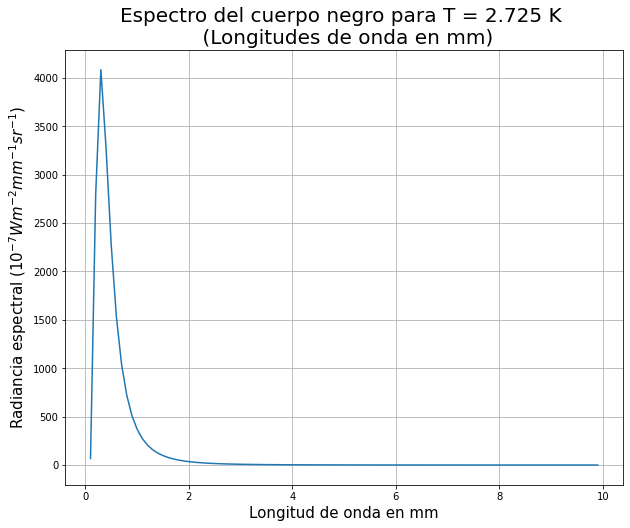

In [ ]:
wl = np.arange(0.1,10,0.1) * pq.mm
I = B(wl,TCMB).rescale(pq.watt/(pq.m**2 * pq.mm * pq.sr))

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(wl, I*1e7)
ax.set_title('Espectro del cuerpo negro para T = 2.725 K \
\n (Longitudes de onda en mm)')
ax.title.set_fontsize(20)
ax.set_xlabel('Longitud de onda en mm')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiancia espectral ($10^{-7} W m^{-2} mm^{-1} sr^{-1}$)')
ax.yaxis.label.set_fontsize(15)
ax.grid()

In [ ]:
def B_f(wf,T):
    '''wf es un array de frecuencias con unidades en GHz
    T es una temperatura expresada en Kelvin
    el resultado es un array de radiancias espectrales
    con unidades W/(m**2 x GHz x sr)
    '''
    wf = wf.rescale(pq.hertz)
    I = 2 * pq.constants.h * wf**3 / pq.c**2 * 1 \
        / (np.exp((pq.constants.h*wf \
        / (pq.constants.k*T)).simplified)-1)
    return I.rescale(pq.watt/(pq.m**2 * pq.gigahertz *pq.sr))

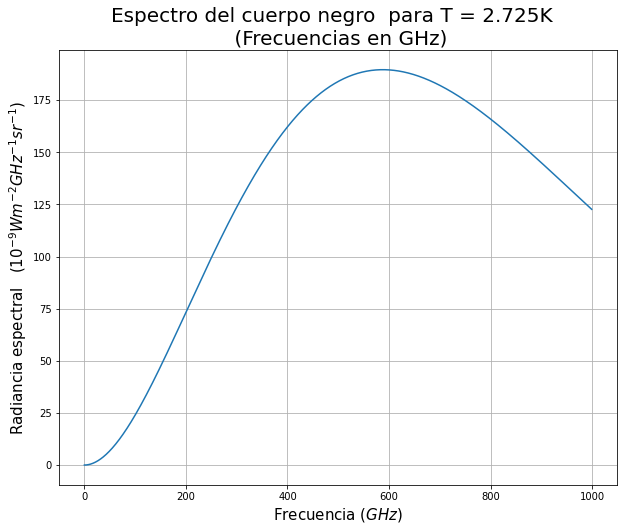

In [ ]:
wf = np.arange(0.1,1000,1)* pq.gigahertz
I = B_f(wf,TCMB)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(wf, I*10**9) # Escalamos las unidades
ax.set_title('Espectro del cuerpo negro  para T = 2.725K \
 \n (Frecuencias en GHz)')
ax.title.set_fontsize(20)
ax.set_xlabel('Frecuencia ($GHz)$')
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel('Radiancia espectral   $(10^{-9} W m^{-2} GHz^{-1} sr^{-1})$')
ax.yaxis.label.set_fontsize(15)
ax.grid()